# Classification Deep Dive: Comprehensive Tutorial

This notebook provides an in-depth exploration of classification algorithms, evaluation techniques, and advanced patterns for real-world applications.

## 🎯 Learning Objectives

By the end of this tutorial, you'll master:
- **6+ classification algorithms** with their strengths and use cases
- **Advanced evaluation metrics** beyond simple accuracy
- **Class imbalance handling** techniques
- **Feature engineering** for classification
- **Model interpretation** and explainability
- **Production deployment** considerations

## 📋 Table of Contents

1. [Data Loading and Exploration](#1-data-loading-and-exploration)
2. [Binary Classification Fundamentals](#2-binary-classification-fundamentals)
3. [Multi-class Classification](#3-multi-class-classification)
4. [Advanced Evaluation Techniques](#4-advanced-evaluation-techniques)
5. [Handling Class Imbalance](#5-handling-class-imbalance)
6. [Feature Engineering for Classification](#6-feature-engineering-for-classification)
7. [Model Interpretation and Explainability](#7-model-interpretation-and-explainability)
8. [Production Considerations](#8-production-considerations)
9. [Advanced Techniques](#9-advanced-techniques)
10. [Summary and Best Practices](#10-summary-and-best-practices)

In [1]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, LGBMClassifier
import seaborn as sns
from sklearn.datasets import load_wine, load_breast_cancer, make_classification
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold,
    GridSearchCV, learning_curve, validation_curve
)
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    VotingClassifier, BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_recall_curve, roc_curve, roc_auc_score,
    precision_score, recall_score, f1_score, cohen_kappa_score
)
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.inspection import permutation_importance
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("✅ All packages imported successfully!")
print(f"📅 Notebook started at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All packages imported successfully!
📅 Notebook started at: 2025-06-27 15:06:11


## 1. Data Loading and Exploration

We'll work with multiple datasets to demonstrate different classification scenarios.

In [2]:
# Load multiple datasets for comprehensive analysis
print("📊 Loading Classification Datasets")
print("=" * 35)

# Dataset 1: Wine Classification (Multi-class)
wine_data = load_wine()
wine_X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_y = wine_data.target
wine_target_names = wine_data.target_names

print(f"🍷 Wine Dataset:")
print(f"   Shape: {wine_X.shape}")
print(f"   Classes: {len(wine_target_names)} - {list(wine_target_names)}")
print(f"   Class distribution: {np.bincount(wine_y)}")

# Dataset 2: Breast Cancer (Binary)
cancer_data = load_breast_cancer()
cancer_X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_y = cancer_data.target
cancer_target_names = cancer_data.target_names

print(f"\n🏥 Breast Cancer Dataset:")
print(f"   Shape: {cancer_X.shape}")
print(f"   Classes: {len(cancer_target_names)} - {list(cancer_target_names)}")
print(f"   Class distribution: {np.bincount(cancer_y)}")

# Dataset 3: Imbalanced Synthetic Dataset
imbalanced_X, imbalanced_y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=3,
    weights=[0.7, 0.2, 0.1],  # Imbalanced classes
    random_state=42
)
imbalanced_X = pd.DataFrame(imbalanced_X, columns=[f'feature_{i}' for i in range(20)])

print(f"\n⚖️ Imbalanced Synthetic Dataset:")
print(f"   Shape: {imbalanced_X.shape}")
print(f"   Classes: 3 classes")
print(f"   Class distribution: {np.bincount(imbalanced_y)}")
print(f"   Class proportions: {np.bincount(imbalanced_y) / len(imbalanced_y)}")

print("\n✅ All datasets loaded successfully!")

📊 Loading Classification Datasets
🍷 Wine Dataset:
   Shape: (178, 13)
   Classes: 3 - [np.str_('class_0'), np.str_('class_1'), np.str_('class_2')]
   Class distribution: [59 71 48]

🏥 Breast Cancer Dataset:
   Shape: (569, 30)
   Classes: 2 - [np.str_('malignant'), np.str_('benign')]
   Class distribution: [212 357]

⚖️ Imbalanced Synthetic Dataset:
   Shape: (1000, 20)
   Classes: 3 classes
   Class distribution: [695 201 104]
   Class proportions: [0.695 0.201 0.104]

✅ All datasets loaded successfully!


In [3]:
# Comprehensive data exploration
def explore_dataset(X, y, target_names, dataset_name):
    """
    Comprehensive exploration of a classification dataset.
    """
    print(f"\n🔍 Exploring {dataset_name} Dataset")
    print("=" * (len(dataset_name) + 20))
    
    # Basic statistics
    print(f"📊 Dataset Shape: {X.shape}")
    print(f"🎯 Number of Classes: {len(np.unique(y))}")
    print(f"📈 Feature Types: {X.dtypes.value_counts().to_dict()}")
    
    # Class distribution
    class_counts = np.bincount(y)
    class_props = class_counts / len(y)
    
    print(f"\n🎭 Class Distribution:")
    for i, (count, prop) in enumerate(zip(class_counts, class_props)):
        class_name = target_names[i] if target_names is not None else f"Class {i}"
        print(f"   {class_name}: {count} samples ({prop:.1%})")
    
    # Check for class imbalance
    max_prop = max(class_props)
    min_prop = min(class_props)
    imbalance_ratio = max_prop / min_prop
    
    if imbalance_ratio > 2:
        print(f"   ⚠️ Class imbalance detected (ratio: {imbalance_ratio:.1f}:1)")
    else:
        print(f"   ✅ Classes are relatively balanced")
    
    # Missing values
    missing_values = X.isnull().sum().sum()
    print(f"\n❓ Missing Values: {missing_values}")
    
    # Feature statistics
    print(f"\n📈 Feature Statistics:")
    print(f"   Mean feature range: [{X.mean().min():.3f}, {X.mean().max():.3f}]")
    print(f"   Std feature range: [{X.std().min():.3f}, {X.std().max():.3f}]")
    
    # Feature scaling recommendation
    feature_ranges = X.max() - X.min()
    max_range = feature_ranges.max()
    min_range = feature_ranges.min()
    
    if max_range / min_range > 10:
        print(f"   🔧 Feature scaling recommended (range ratio: {max_range/min_range:.1f}:1)")
    else:
        print(f"   ✅ Feature scales are relatively similar")
    
    return {
        'shape': X.shape,
        'n_classes': len(np.unique(y)),
        'class_distribution': class_counts,
        'imbalance_ratio': imbalance_ratio,
        'missing_values': missing_values,
        'needs_scaling': max_range / min_range > 10
    }

# Explore all datasets
wine_stats = explore_dataset(wine_X, wine_y, wine_target_names, "Wine")
cancer_stats = explore_dataset(cancer_X, cancer_y, cancer_target_names, "Breast Cancer")
imbalanced_stats = explore_dataset(imbalanced_X, imbalanced_y, None, "Imbalanced Synthetic")


🔍 Exploring Wine Dataset
📊 Dataset Shape: (178, 13)
🎯 Number of Classes: 3
📈 Feature Types: {dtype('float64'): 13}

🎭 Class Distribution:
   class_0: 59 samples (33.1%)
   class_1: 71 samples (39.9%)
   class_2: 48 samples (27.0%)
   ✅ Classes are relatively balanced

❓ Missing Values: 0

📈 Feature Statistics:
   Mean feature range: [0.362, 746.893]
   Std feature range: [0.124, 314.907]
   🔧 Feature scaling recommended (range ratio: 2645.3:1)

🔍 Exploring Breast Cancer Dataset
📊 Dataset Shape: (569, 30)
🎯 Number of Classes: 2
📈 Feature Types: {dtype('float64'): 30}

🎭 Class Distribution:
   malignant: 212 samples (37.3%)
   benign: 357 samples (62.7%)
   ✅ Classes are relatively balanced

❓ Missing Values: 0

📈 Feature Statistics:
   Mean feature range: [0.004, 880.583]
   Std feature range: [0.003, 569.357]
   🔧 Feature scaling recommended (range ratio: 140569.1:1)

🔍 Exploring Imbalanced Synthetic Dataset
📊 Dataset Shape: (1000, 20)
🎯 Number of Classes: 3
📈 Feature Types: {dtype('f

📊 Dataset Visualization


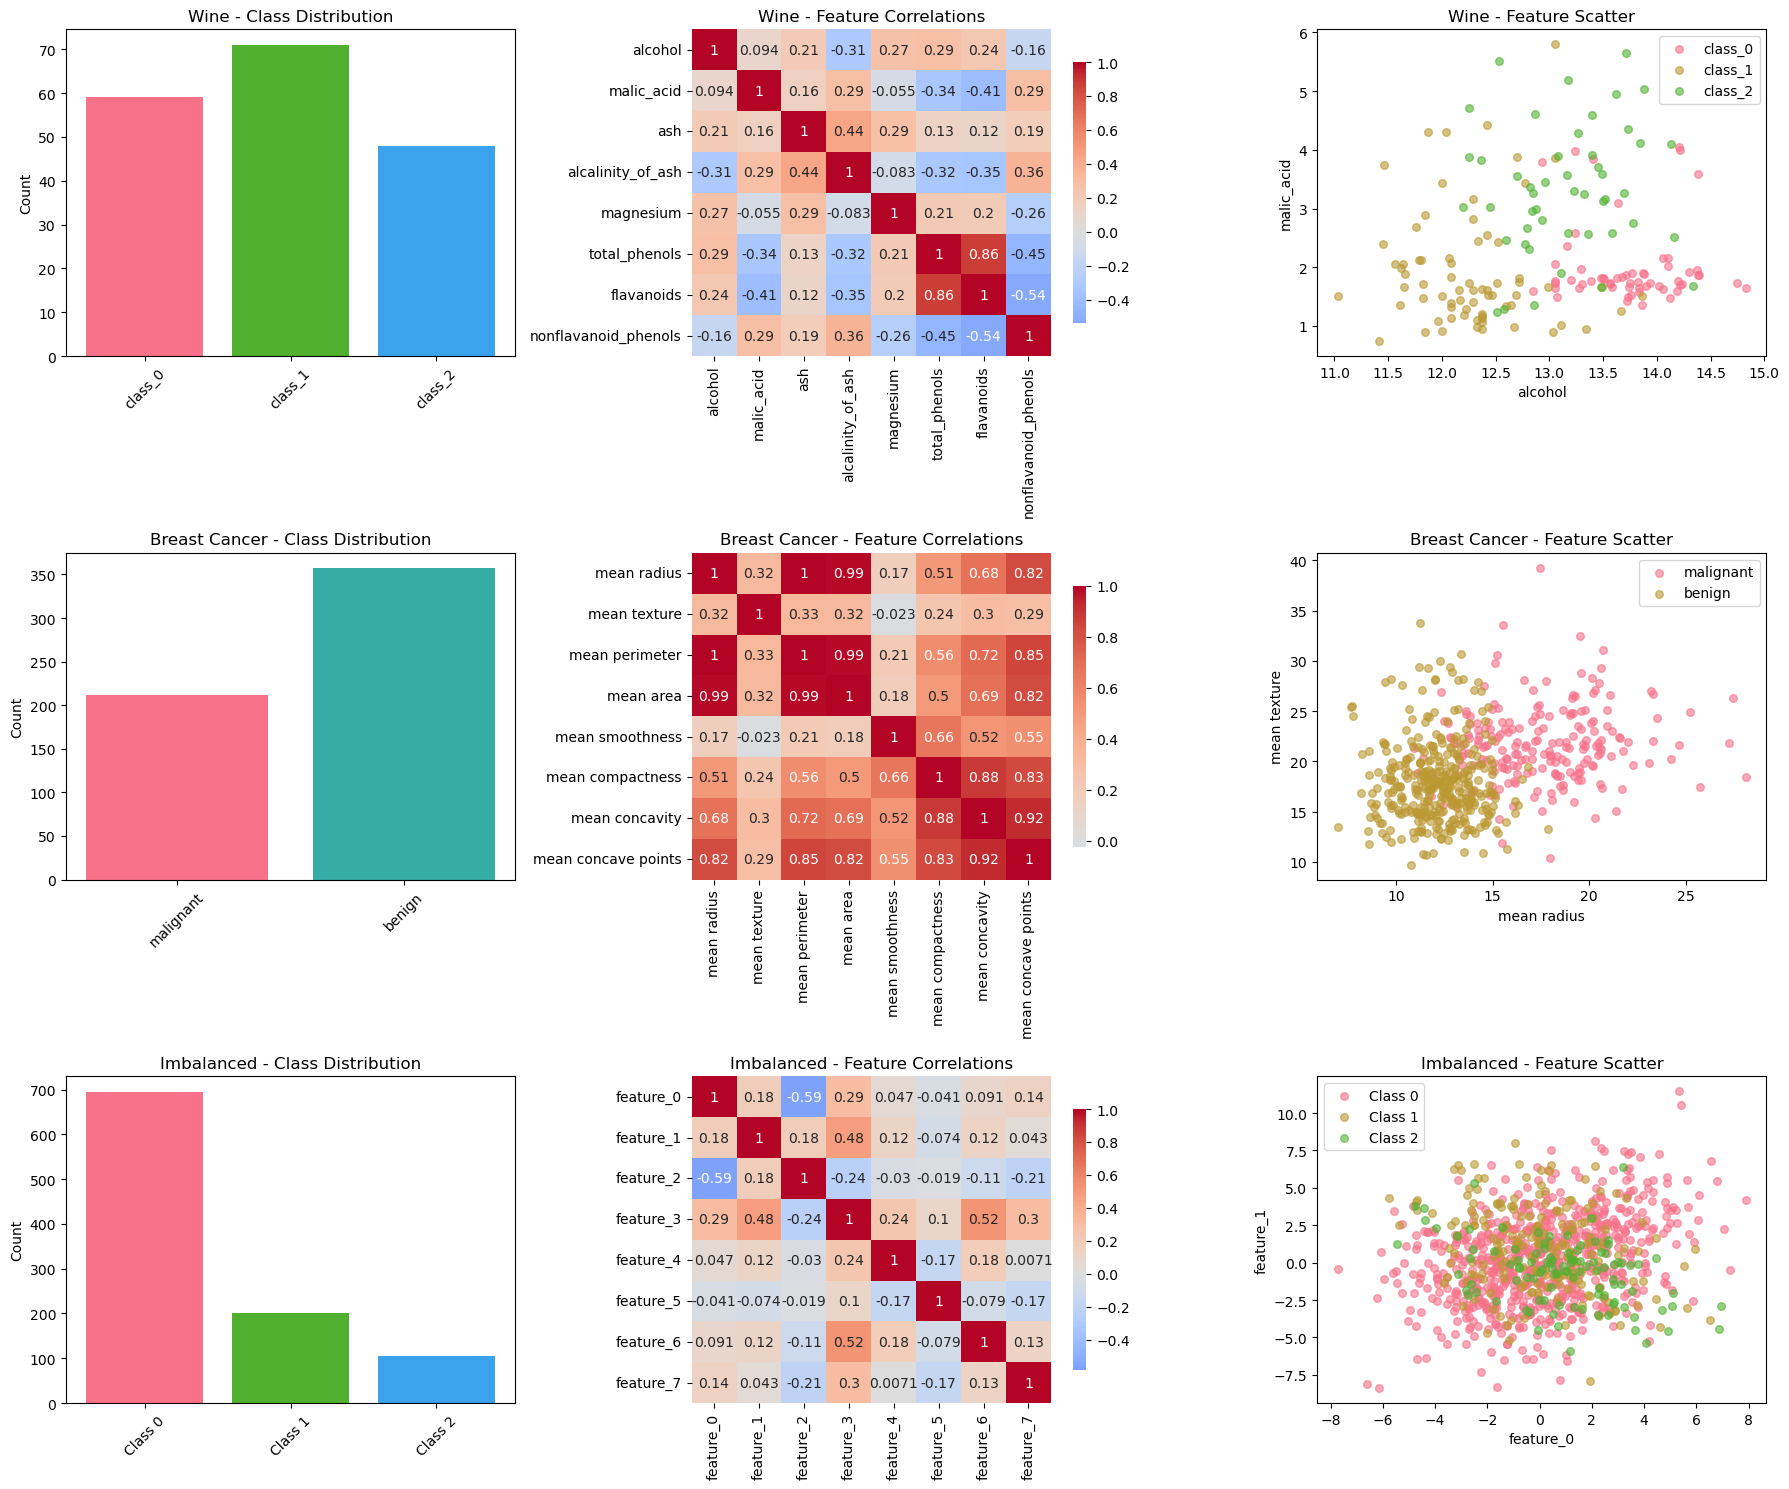

✅ Dataset exploration complete!


In [4]:
# Visualization of dataset characteristics
print("📊 Dataset Visualization")
print("=" * 24)

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

datasets = [
    (wine_X, wine_y, wine_target_names, "Wine"),
    (cancer_X, cancer_y, cancer_target_names, "Breast Cancer"),
    (imbalanced_X, imbalanced_y, None, "Imbalanced")
]

for i, (X, y, target_names, name) in enumerate(datasets):
    # Class distribution
    class_counts = np.bincount(y)
    class_labels = target_names if target_names is not None else [f"Class {j}" for j in range(len(class_counts))]
    
    axes[i, 0].bar(range(len(class_counts)), class_counts, color=sns.color_palette("husl", len(class_counts)))
    axes[i, 0].set_title(f'{name} - Class Distribution')
    axes[i, 0].set_xticks(range(len(class_counts)))
    axes[i, 0].set_xticklabels([label[:10] + '...' if len(label) > 10 else label for label in class_labels], rotation=45)
    axes[i, 0].set_ylabel('Count')
    
    # Feature correlation heatmap (subset of features)
    n_features_to_show = min(8, X.shape[1])
    feature_subset = X.iloc[:, :n_features_to_show]
    corr_matrix = feature_subset.corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[i, 1], cbar_kws={'shrink': 0.8})
    axes[i, 1].set_title(f'{name} - Feature Correlations')
    
    # Feature distribution by class (first 2 features)
    if X.shape[1] >= 2:
        for class_idx in np.unique(y):
            class_data = X[y == class_idx]
            label = class_labels[class_idx] if target_names is not None else f"Class {class_idx}"
            axes[i, 2].scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], 
                             label=label, alpha=0.6, s=30)
        
        axes[i, 2].set_xlabel(X.columns[0][:15] + '...' if len(X.columns[0]) > 15 else X.columns[0])
        axes[i, 2].set_ylabel(X.columns[1][:15] + '...' if len(X.columns[1]) > 15 else X.columns[1])
        axes[i, 2].set_title(f'{name} - Feature Scatter')
        axes[i, 2].legend()

plt.tight_layout()
plt.show()

print("✅ Dataset exploration complete!")

## 2. Binary Classification Fundamentals

Let's start with binary classification using the breast cancer dataset.

In [5]:
# Binary classification with breast cancer dataset
print("🏥 Binary Classification: Breast Cancer Diagnosis")
print("=" * 48)

# Prepare data
X_binary = cancer_X
y_binary = cancer_y
target_names_binary = cancer_target_names

# Split data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Scale features
scaler_bin = StandardScaler()
X_train_bin_scaled = scaler_bin.fit_transform(X_train_bin)
X_test_bin_scaled = scaler_bin.transform(X_test_bin)

print(f"📊 Training set: {X_train_bin_scaled.shape}")
print(f"📊 Test set: {X_test_bin_scaled.shape}")
print(f"🎯 Class distribution (train): {np.bincount(y_train_bin)}")
print(f"🎯 Class distribution (test): {np.bincount(y_test_bin)}")

# Define binary classifiers
binary_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'LightGBM': LGBMClassifier(random_state=42, verbosity=-1),
    'Neural Network - Relu (5,2)': MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(5, 2)),
    'Neural Network - Tanh (5,2)': MLPClassifier(random_state=42, activation='tanh', hidden_layer_sizes=(5, 2)),
    'Neural Network - Relu (5...2)': MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(5, 4, 3, 2)),
    'Neural Network - Tanh (5...2)': MLPClassifier(random_state=42, activation='tanh', hidden_layer_sizes=(5, 4, 3, 2)),
    'Neural Network - HUGE': MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100))

}

print(f"\n🤖 Training {len(binary_classifiers)} binary classifiers...")

binary_results = {}

for name, classifier in binary_classifiers.items():
    print(f"\n🔄 Training {name}...")
    
    start_time = datetime.now()
    
    # Train the model
    classifier.fit(X_train_bin_scaled, y_train_bin)
    
    # Predictions
    y_pred = classifier.predict(X_test_bin_scaled)
    y_pred_proba = classifier.predict_proba(X_test_bin_scaled)[:, 1]  # Probability of positive class
    
    training_time = (datetime.now() - start_time).total_seconds()
    
    # Calculate comprehensive metrics
    accuracy = accuracy_score(y_test_bin, y_pred)
    precision = precision_score(y_test_bin, y_pred)
    recall = recall_score(y_test_bin, y_pred)
    f1 = f1_score(y_test_bin, y_pred)
    auc = roc_auc_score(y_test_bin, y_pred_proba)
    kappa = cohen_kappa_score(y_test_bin, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(classifier, X_train_bin_scaled, y_train_bin, cv=5, scoring='accuracy')
    cv_auc_scores = cross_val_score(classifier, X_train_bin_scaled, y_train_bin, cv=5, scoring='roc_auc')
    
    binary_results[name] = {
        'model': classifier,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc,
        'kappa': kappa,
        'cv_accuracy': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std(),
        'cv_auc': cv_auc_scores.mean(),
        'cv_auc_std': cv_auc_scores.std(),
        'training_time': training_time,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"   ✅ Accuracy: {accuracy:.3f} | Precision: {precision:.3f} | Recall: {recall:.3f}")
    print(f"      F1: {f1:.3f} | AUC: {auc:.3f} | CV-Acc: {cv_scores.mean():.3f}±{cv_scores.std():.3f}")
    print(f"      Time: {training_time:.2f}s")

print("\n🏆 Binary classification training complete!")

🏥 Binary Classification: Breast Cancer Diagnosis
📊 Training set: (455, 30)
📊 Test set: (114, 30)
🎯 Class distribution (train): [170 285]
🎯 Class distribution (test): [42 72]

🤖 Training 13 binary classifiers...

🔄 Training Logistic Regression...
   ✅ Accuracy: 0.982 | Precision: 0.986 | Recall: 0.986
      F1: 0.986 | AUC: 0.995 | CV-Acc: 0.980±0.013
      Time: 0.00s

🔄 Training Random Forest...
   ✅ Accuracy: 0.956 | Precision: 0.959 | Recall: 0.972
      F1: 0.966 | AUC: 0.994 | CV-Acc: 0.954±0.023
      Time: 0.16s

🔄 Training Gradient Boosting...
   ✅ Accuracy: 0.956 | Precision: 0.947 | Recall: 0.986
      F1: 0.966 | AUC: 0.991 | CV-Acc: 0.958±0.011
      Time: 0.53s

🔄 Training SVM (RBF)...
   ✅ Accuracy: 0.982 | Precision: 0.986 | Recall: 0.986
      F1: 0.986 | AUC: 0.995 | CV-Acc: 0.971±0.018
      Time: 0.01s

🔄 Training SVM (Linear)...
   ✅ Accuracy: 0.974 | Precision: 0.986 | Recall: 0.972
      F1: 0.979 | AUC: 0.996 | CV-Acc: 0.967±0.014
      Time: 0.01s

🔄 Training Na

📊 Binary Classification Evaluation


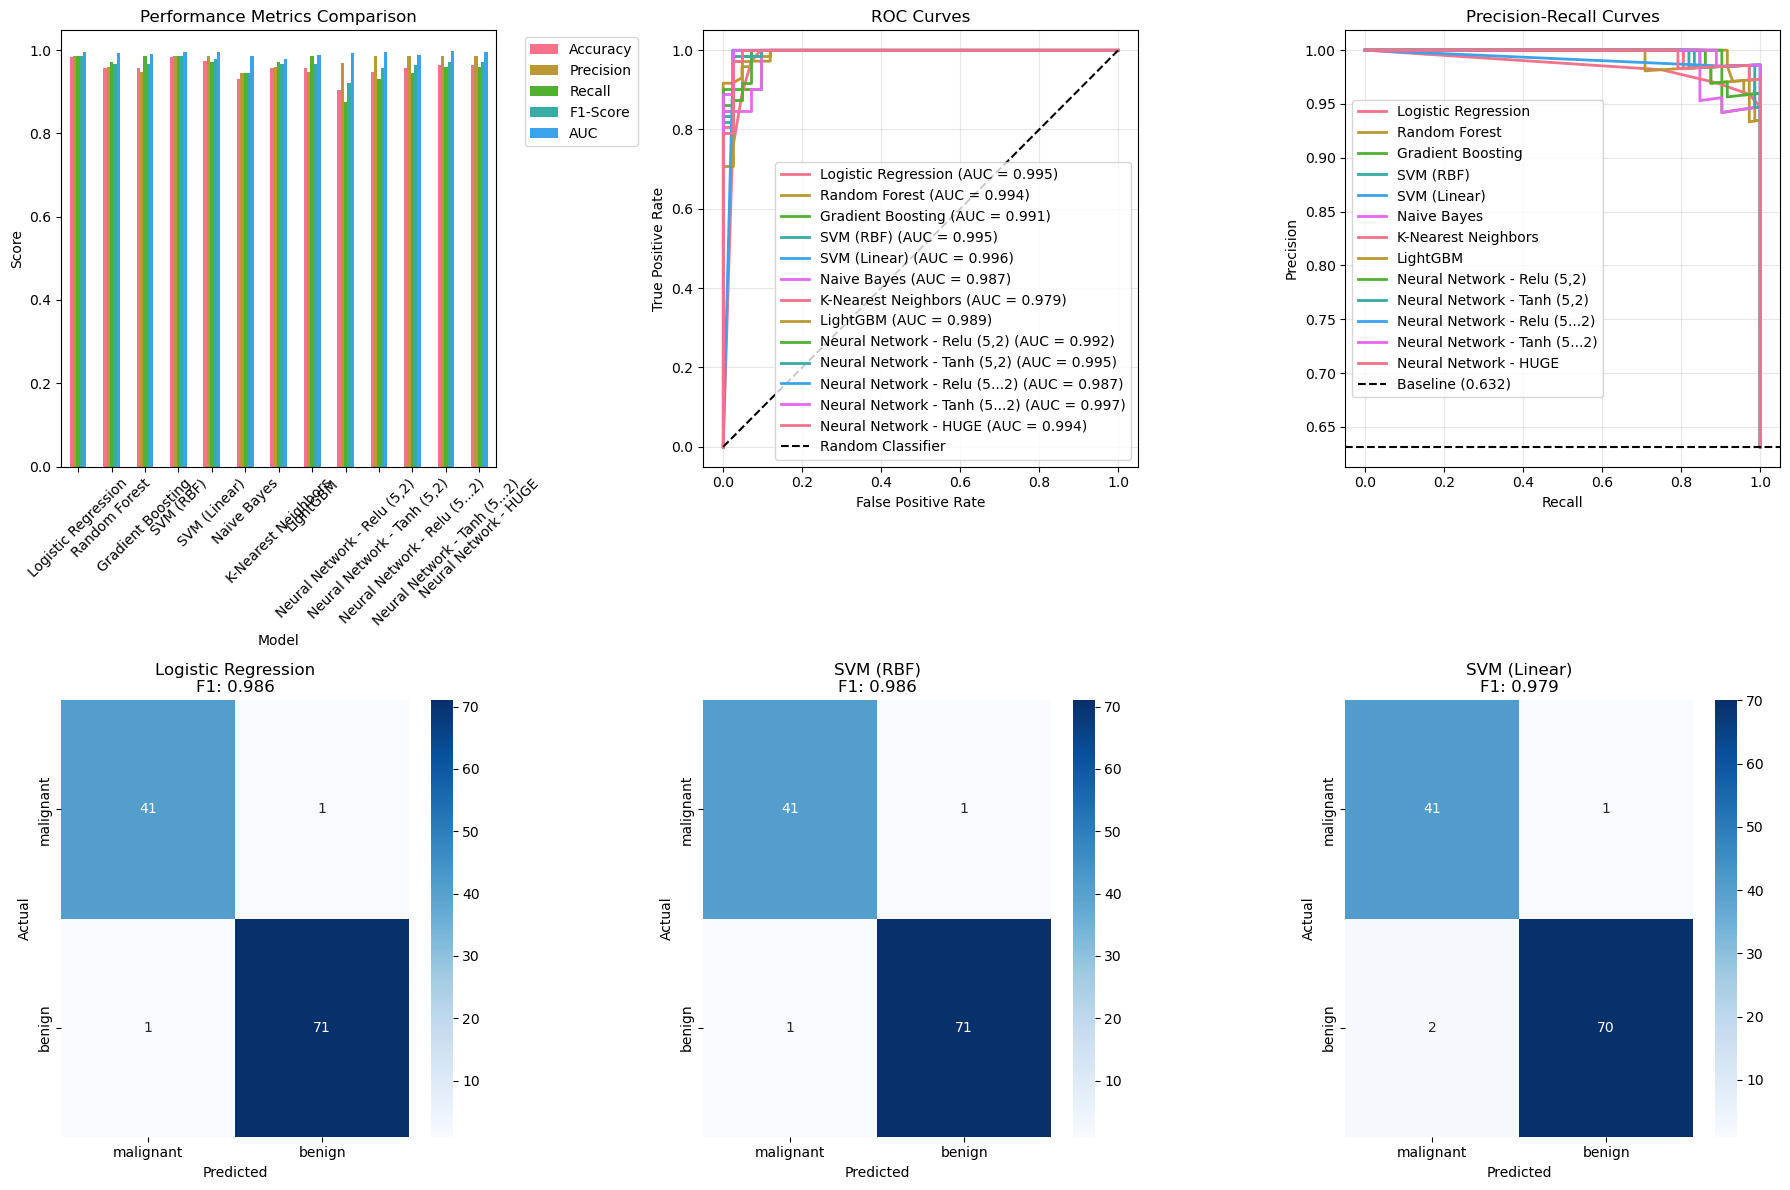


📋 Binary Classification Results Summary:
                        Model Accuracy F1-Score   AUC CV-Accuracy Time (s)
          Logistic Regression    0.982    0.986 0.995 0.980±0.013     0.00
                    SVM (RBF)    0.982    0.986 0.995 0.971±0.018     0.01
                 SVM (Linear)    0.974    0.979 0.996 0.967±0.014     0.01
Neural Network - Tanh (5...2)    0.965    0.972 0.997 0.976±0.018     0.13
        Neural Network - HUGE    0.965    0.972 0.994 0.965±0.025     0.43
            Gradient Boosting    0.956    0.966 0.991 0.958±0.011     0.53
                     LightGBM    0.956    0.966 0.989 0.976±0.019     0.13
                Random Forest    0.956    0.966 0.994 0.954±0.023     0.16
          K-Nearest Neighbors    0.956    0.966 0.979 0.967±0.021     0.11
Neural Network - Relu (5...2)    0.956    0.965 0.987 0.967±0.021     0.14
  Neural Network - Tanh (5,2)    0.947    0.957 0.995 0.971±0.009     0.08
                  Naive Bayes    0.930    0.944 0.987 0.93

In [6]:
# Binary classification evaluation and visualization
print("📊 Binary Classification Evaluation")
print("=" * 35)

# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# 1. Metrics comparison
metrics_data = []
for name, results in binary_results.items():
    metrics_data.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'AUC': results['auc']
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']].plot(
    kind='bar', ax=axes[0], rot=45
)
axes[0].set_title('Performance Metrics Comparison')
axes[0].set_ylabel('Score')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. ROC Curves
for name, results in binary_results.items():
    y_proba = results['probabilities']
    fpr, tpr, _ = roc_curve(y_test_bin, y_proba)
    auc_score = results['auc']
    
    axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Precision-Recall Curves
for name, results in binary_results.items():
    y_proba = results['probabilities']
    precision_curve, recall_curve, _ = precision_recall_curve(y_test_bin, y_proba)
    
    axes[2].plot(recall_curve, precision_curve, label=name, linewidth=2)

# Baseline precision (proportion of positive class)
baseline_precision = np.mean(y_test_bin)
axes[2].axhline(y=baseline_precision, color='k', linestyle='--', 
                label=f'Baseline ({baseline_precision:.3f})')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curves')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Confusion matrices for top 3 models
top_models = sorted(binary_results.items(), key=lambda x: x[1]['f1_score'], reverse=True)[:3]

for i, (name, results) in enumerate(top_models):
    y_pred = results['predictions']
    cm = confusion_matrix(y_test_bin, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_binary, yticklabels=target_names_binary,
                ax=axes[3 + i])
    axes[3 + i].set_title(f'{name}\nF1: {results["f1_score"]:.3f}')
    axes[3 + i].set_xlabel('Predicted')
    axes[3 + i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Summary table
print("\n📋 Binary Classification Results Summary:")
summary_df = pd.DataFrame({
    'Model': list(binary_results.keys()),
    'Accuracy': [f"{r['accuracy']:.3f}" for r in binary_results.values()],
    'F1-Score': [f"{r['f1_score']:.3f}" for r in binary_results.values()],
    'AUC': [f"{r['auc']:.3f}" for r in binary_results.values()],
    'CV-Accuracy': [f"{r['cv_accuracy']:.3f}±{r['cv_accuracy_std']:.3f}" for r in binary_results.values()],
    'Time (s)': [f"{r['training_time']:.2f}" for r in binary_results.values()]
})

# Sort by F1-score
summary_df['F1_numeric'] = [r['f1_score'] for r in binary_results.values()]
summary_df = summary_df.sort_values('F1_numeric', ascending=False).drop('F1_numeric', axis=1)

print(summary_df.to_string(index=False))

print("\n✅ Binary classification evaluation complete!")

## 3. Multi-class Classification

Now let's explore multi-class classification using the wine dataset.

In [ ]:
# Multi-class classification with wine dataset
print("🍷 Multi-class Classification: Wine Quality")
print("=" * 42)

# Prepare data
X_multi = wine_X
y_multi = wine_y
target_names_multi = wine_target_names

# Split data with stratification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42, stratify=y_multi
)

# Scale features
scaler_multi = StandardScaler()
X_train_multi_scaled = scaler_multi.fit_transform(X_train_multi)
X_test_multi_scaled = scaler_multi.transform(X_test_multi)

print(f"📊 Training set: {X_train_multi_scaled.shape}")
print(f"📊 Test set: {X_test_multi_scaled.shape}")
print(f"🎯 Class distribution (train): {np.bincount(y_train_multi)}")
print(f"🎯 Class distribution (test): {np.bincount(y_test_multi)}")

# Multi-class classifiers
multi_classifiers = {
    'Logistic Regression (OvR)': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'),
    'Logistic Regression (Multi)': LogisticRegression(random_state=42, max_iter=1000, multi_class='multinomial'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42, probability=True),
    'SVM (Poly)': SVC(kernel='poly', degree=3, random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'LightGBM': LGBMClassifier(random_state=42, verbosity=-1),
    'Neural Network - Relu (5,2)': MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(5, 2)),
    'Neural Network - Tanh (5,2)': MLPClassifier(random_state=42, activation='tanh', hidden_layer_sizes=(5, 2)),
    'Neural Network - Relu (5...2)': MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(5, 4, 3, 2)),
    'Neural Network - Tanh (5...2)': MLPClassifier(random_state=42, activation='tanh', hidden_layer_sizes=(5, 4, 3, 2)),
    'Neural Network - HUGE': MLPClassifier(random_state=42, activation='relu', hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100))
}

#Nates stuff
neural_network = MLPClassifier(random_state=42)
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'hidden_layer_sizes': [(2,2,2), (5,5,2), (5,2), (5,4,3,2), (100, 100, 100, 100, 100, 100, 100, 100, 100, 100)],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

grid_search = GridSearchCV(
    neural_network, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0
)

grid_search.fit(X_train_multi_scaled, y_train_multi)

print("Grid Search Results")
print(f"\tBest parameters: {grid_search.best_params_}")
print(f"\tBest CV score: {grid_search.best_score_:.3f}")
print(f"\tTotal combinations tested: {len(grid_search.cv_results_['params'])}")

# Predict with best model
best_nn = grid_search.best_estimator_
y_pred_best = best_nn.predict(X_test_multi_scaled)
y_pred_proba_best = best_nn.predict_proba(X_test_multi_scaled)

# Scores
accuracy_nn = accuracy_score(y_test_multi, y_pred_best)
f1_macro_nn = f1_score(y_test_multi, y_pred_best, average='macro')
auc_macro_nn = roc_auc_score(y_test_multi, y_pred_proba_best, multi_class='ovr', average='macro')
kappa_nn = cohen_kappa_score(y_test_multi, y_pred_best)
cv_scores_nn = cross_val_score(best_nn, X_train_multi_scaled, y_train_multi, cv=5, scoring='accuracy')

#End Nates Stuff


print(f"\n🤖 Training {len(multi_classifiers)} multi-class classifiers...")

multi_results = {}

for name, classifier in multi_classifiers.items():
    print(f"\n🔄 Training {name}...")
    
    start_time = datetime.now()
    
    # Train the model
    classifier.fit(X_train_multi_scaled, y_train_multi)
    
    # Predictions
    y_pred = classifier.predict(X_test_multi_scaled)
    y_pred_proba = classifier.predict_proba(X_test_multi_scaled)
    
    training_time = (datetime.now() - start_time).total_seconds()
    
    # Calculate metrics for multi-class
    accuracy = accuracy_score(y_test_multi, y_pred)
    precision_macro = precision_score(y_test_multi, y_pred, average='macro')
    recall_macro = recall_score(y_test_multi, y_pred, average='macro')
    f1_macro = f1_score(y_test_multi, y_pred, average='macro')
    f1_weighted = f1_score(y_test_multi, y_pred, average='weighted')
    
    # Multi-class AUC
    auc_macro = roc_auc_score(y_test_multi, y_pred_proba, multi_class='ovr', average='macro')
    auc_weighted = roc_auc_score(y_test_multi, y_pred_proba, multi_class='ovr', average='weighted')
    
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test_multi, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(classifier, X_train_multi_scaled, y_train_multi, cv=5, scoring='accuracy')
    cv_f1_scores = cross_val_score(classifier, X_train_multi_scaled, y_train_multi, cv=5, scoring='f1_macro')
    
    # Per-class metrics
    class_report = classification_report(y_test_multi, y_pred, target_names=target_names_multi, output_dict=True)
    
    multi_results[name] = {
        'model': classifier,
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'auc_macro': auc_macro,
        'auc_weighted': auc_weighted,
        'kappa': kappa,
        'cv_accuracy': cv_scores.mean(),
        'cv_accuracy_std': cv_scores.std(),
        'cv_f1': cv_f1_scores.mean(),
        'cv_f1_std': cv_f1_scores.std(),
        'training_time': training_time,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'classification_report': class_report
    }
    
    print(f"   ✅ Accuracy: {accuracy:.3f} | F1-Macro: {f1_macro:.3f} | AUC-Macro: {auc_macro:.3f}")
    print(f"      Kappa: {kappa:.3f} | CV-Acc: {cv_scores.mean():.3f}±{cv_scores.std():.3f}")
    print(f"      Time: {training_time:.2f}s")

#Nate Added
print(f"\n🔄 Training Best Neural Network...")
print(f"   ✅ Accuracy: {accuracy_nn:.3f} | F1-Macro: {f1_macro_nn:.3f} | AUC-Macro: {auc_macro_nn:.3f}")
print(f"      Kappa: {kappa_nn:.3f} | CV-Acc: {cv_scores_nn.mean():.3f}±{cv_scores_nn.std():.3f}")
print(f"      Time: NA")

cv_scores = cross_val_score(multi_results['Neural Network - HUGE']['model'], X_train_multi_scaled, y_train_multi, cv=5, scoring='accuracy')
print(f"The HUGE Model STD: {cv_scores.mean():.3f} +/- {cv_scores.std():.3f}")

results_df = pd.DataFrame(grid_search.cv_results_)
params_df = results_df['params'].apply(pd.Series)
full_results = pd.concat([results_df, params_df], axis=1)

full_results_sorted = full_results.sort_values(by='mean_test_score', ascending=False)
print(full_results_sorted[['mean_test_score', 'std_test_score', 'activation', 'solver', 'learning_rate']])

print("\n🏆 Multi-class classification training complete!")

🍷 Multi-class Classification: Wine Quality
📊 Training set: (142, 13)
📊 Test set: (36, 13)
🎯 Class distribution (train): [47 57 38]
🎯 Class distribution (test): [12 14 10]


/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

Grid Search Results
	Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100, 100, 100, 100, 100), 'learning_rate': 'constant', 'solver': 'lbfgs'}
	Best CV score: 0.986
	Total combinations tested: 135

🤖 Training 14 multi-class classifiers...

🔄 Training Logistic Regression (OvR)...
   ✅ Accuracy: 1.000 | F1-Macro: 1.000 | AUC-Macro: 1.000
      Kappa: 1.000 | CV-Acc: 0.986±0.017
      Time: 0.00s

🔄 Training Logistic Regression (Multi)...
   ✅ Accuracy: 0.972 | F1-Macro: 0.971 | AUC-Macro: 1.000
      Kappa: 0.958 | CV-Acc: 0.986±0.017
      Time: 0.00s

🔄 Training Random Forest...
   ✅ Accuracy: 1.000 | F1-Macro: 1.000 | AUC-Macro: 1.000
      Kappa: 1.000 | CV-Acc: 0.986±0.028
      Time: 0.07s

🔄 Training Gradient Boosting...
   ✅ Accuracy: 0.944 | F1-Macro: 0.945 | AUC-Macro: 0.998
      Kappa: 0.916 | CV-Acc: 0.951±0.047
      Time: 0.26s

🔄 Training SVM (RBF)...
   ✅ Accuracy: 0.972 | F1-Macro: 0.971 | AUC-Macro: 1.000
      Kappa: 0.958 | CV-

📊 Multi-class Classification Evaluation


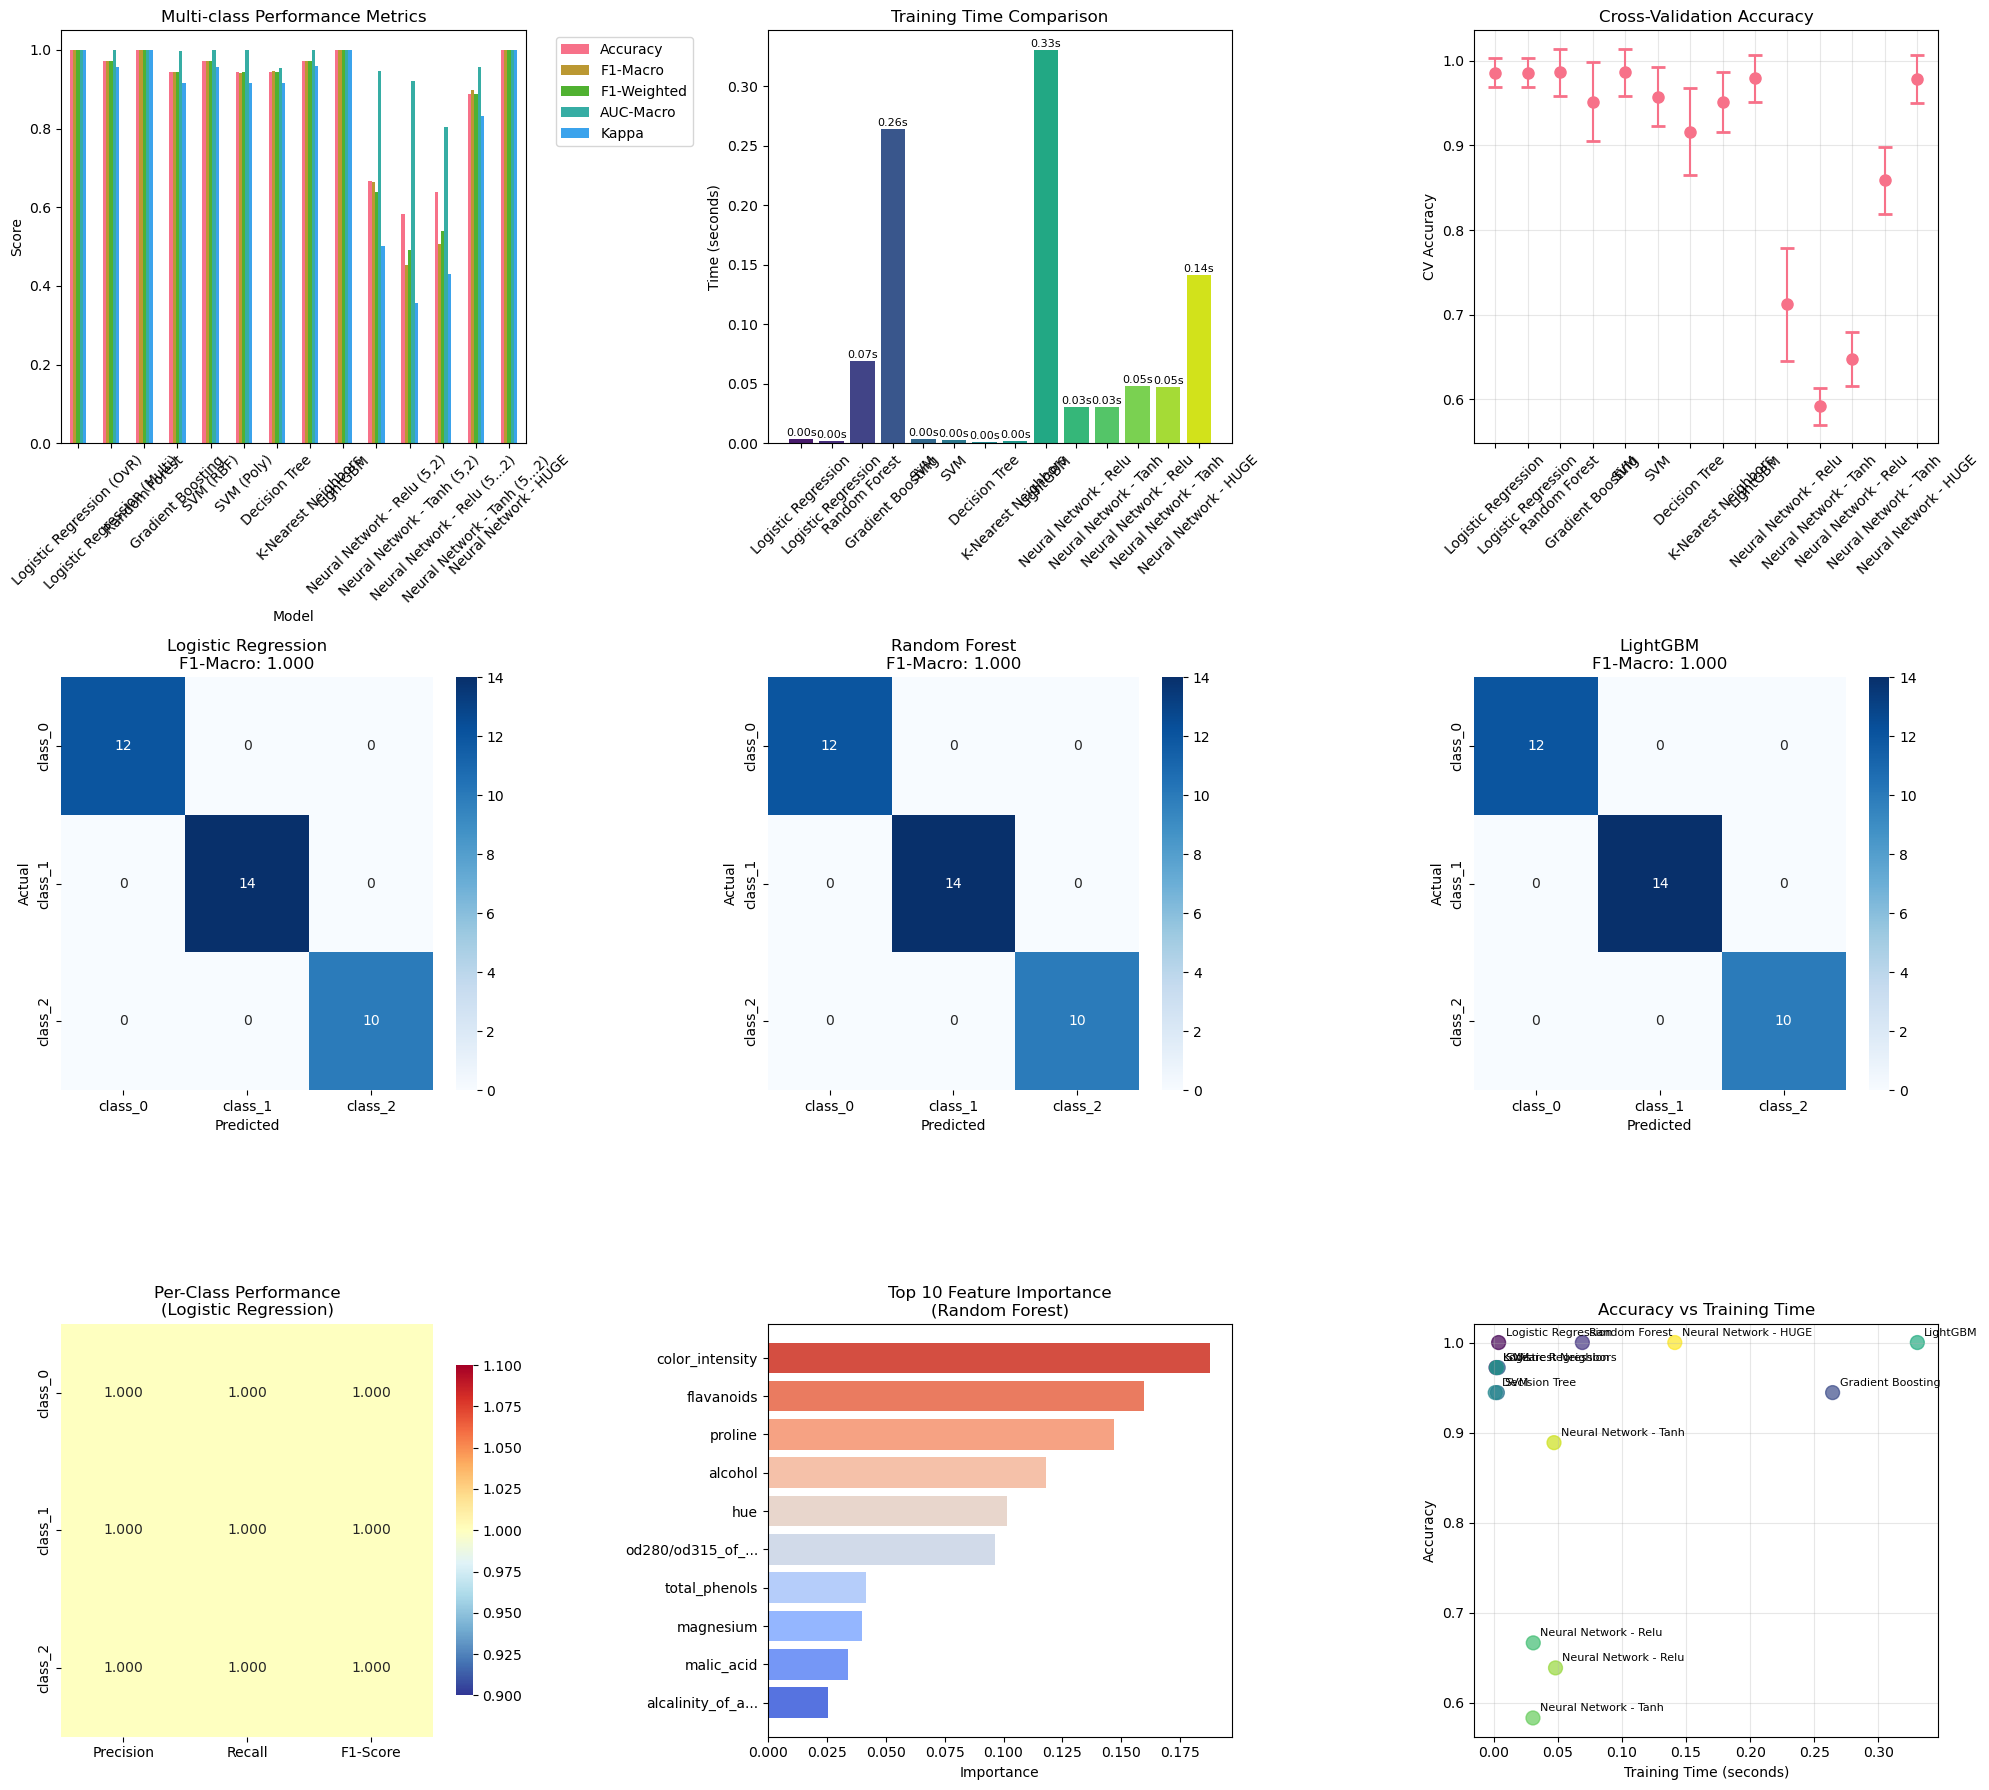


📋 Multi-class Classification Results Summary:
                Model Accuracy F1-Macro F1-Weighted AUC-Macro Kappa      CV-Acc Time (s)
  Logistic Regression    1.000    1.000       1.000     1.000 1.000 0.986±0.017     0.00
        Random Forest    1.000    1.000       1.000     1.000 1.000 0.986±0.028     0.07
             LightGBM    1.000    1.000       1.000     1.000 1.000 0.979±0.028     0.33
Neural Network - HUGE    1.000    1.000       1.000     1.000 1.000 0.979±0.028     0.14
  K-Nearest Neighbors    0.972    0.972       0.972     0.999 0.958 0.951±0.035     0.00
  Logistic Regression    0.972    0.971       0.972     1.000 0.958 0.986±0.017     0.00
                  SVM    0.972    0.971       0.972     1.000 0.958 0.986±0.028     0.00
        Decision Tree    0.944    0.946       0.945     0.954 0.915 0.916±0.051     0.00
    Gradient Boosting    0.944    0.945       0.944     0.998 0.916 0.951±0.047     0.26
                  SVM    0.944    0.941       0.943     0.999 0

In [8]:
# Multi-class classification evaluation and visualization
print("📊 Multi-class Classification Evaluation")
print("=" * 40)

# Create comprehensive evaluation plots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.ravel()

# 1. Overall metrics comparison
metrics_data = []
for name, results in multi_results.items():
    metrics_data.append({
        'Model': name,
        'Accuracy': results['accuracy'],
        'F1-Macro': results['f1_macro'],
        'F1-Weighted': results['f1_weighted'],
        'AUC-Macro': results['auc_macro'],
        'Kappa': results['kappa']
    })

metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Model')[['Accuracy', 'F1-Macro', 'F1-Weighted', 'AUC-Macro', 'Kappa']].plot(
    kind='bar', ax=axes[0], rot=45
)
axes[0].set_title('Multi-class Performance Metrics')
axes[0].set_ylabel('Score')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 2. Training time comparison
model_names = list(multi_results.keys())
training_times = [results['training_time'] for results in multi_results.values()]

bars = axes[1].bar(range(len(model_names)), training_times, 
                   color=sns.color_palette("viridis", len(model_names)))
axes[1].set_title('Training Time Comparison')
axes[1].set_ylabel('Time (seconds)')
axes[1].set_xticks(range(len(model_names)))
axes[1].set_xticklabels([name.split('(')[0].strip() for name in model_names], rotation=45)

# Add time labels on bars
for bar, time in zip(bars, training_times):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{time:.2f}s', ha='center', va='bottom', fontsize=8)

# 3. Cross-validation scores with error bars
cv_means = [results['cv_accuracy'] for results in multi_results.values()]
cv_stds = [results['cv_accuracy_std'] for results in multi_results.values()]

axes[2].errorbar(range(len(model_names)), cv_means, yerr=cv_stds, 
                fmt='o', capsize=5, capthick=2, markersize=8)
axes[2].set_title('Cross-Validation Accuracy')
axes[2].set_ylabel('CV Accuracy')
axes[2].set_xticks(range(len(model_names)))
axes[2].set_xticklabels([name.split('(')[0].strip() for name in model_names], rotation=45)
axes[2].grid(True, alpha=0.3)

# 4-6. Confusion matrices for top 3 models
top_models = sorted(multi_results.items(), key=lambda x: x[1]['f1_macro'], reverse=True)[:3]

for i, (name, results) in enumerate(top_models):
    y_pred = results['predictions']
    cm = confusion_matrix(y_test_multi, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_multi, yticklabels=target_names_multi,
                ax=axes[3 + i])
    axes[3 + i].set_title(f'{name.split("(")[0].strip()}\nF1-Macro: {results["f1_macro"]:.3f}')
    axes[3 + i].set_xlabel('Predicted')
    axes[3 + i].set_ylabel('Actual')

# 7. Per-class performance heatmap
best_model_name, best_results = max(multi_results.items(), key=lambda x: x[1]['f1_macro'])
class_report = best_results['classification_report']

# Extract per-class metrics
per_class_metrics = []
for class_name in target_names_multi:
    if class_name in class_report:
        per_class_metrics.append([
            class_report[class_name]['precision'],
            class_report[class_name]['recall'],
            class_report[class_name]['f1-score']
        ])

per_class_df = pd.DataFrame(per_class_metrics, 
                           columns=['Precision', 'Recall', 'F1-Score'],
                           index=target_names_multi)

sns.heatmap(per_class_df, annot=True, fmt='.3f', cmap='RdYlBu_r', 
            ax=axes[6], cbar_kws={'shrink': 0.8})
axes[6].set_title(f'Per-Class Performance\n({best_model_name.split("(")[0].strip()})')

# 8. Feature importance (for tree-based models)
tree_models = [(name, results) for name, results in multi_results.items() 
               if hasattr(results['model'], 'feature_importances_')]

if tree_models:
    best_tree_name, best_tree_results = max(tree_models, key=lambda x: x[1]['f1_macro'])
    importances = best_tree_results['model'].feature_importances_
    feature_names = X_multi.columns
    
    # Get top 10 features
    top_indices = np.argsort(importances)[-10:]
    top_importances = importances[top_indices]
    top_features = [feature_names[i] for i in top_indices]
    
    axes[7].barh(range(10), top_importances, color=sns.color_palette("coolwarm", 10))
    axes[7].set_yticks(range(10))
    axes[7].set_yticklabels([name[:15] + '...' if len(name) > 15 else name for name in top_features])
    axes[7].set_title(f'Top 10 Feature Importance\n({best_tree_name.split("(")[0].strip()})')
    axes[7].set_xlabel('Importance')
else:
    axes[7].text(0.5, 0.5, 'No tree-based models\navailable for\nfeature importance', 
                ha='center', va='center', transform=axes[7].transAxes, fontsize=12)
    axes[7].set_title('Feature Importance')

# 9. Accuracy vs Training Time scatter
accuracies = [results['accuracy'] for results in multi_results.values()]
times = [results['training_time'] for results in multi_results.values()]

scatter = axes[8].scatter(times, accuracies, s=100, alpha=0.7, 
                         c=range(len(model_names)), cmap='viridis')

for i, name in enumerate(model_names):
    axes[8].annotate(name.split('(')[0].strip(), 
                    (times[i], accuracies[i]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=8)

axes[8].set_xlabel('Training Time (seconds)')
axes[8].set_ylabel('Accuracy')
axes[8].set_title('Accuracy vs Training Time')
axes[8].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary table
print("\n📋 Multi-class Classification Results Summary:")
summary_df = pd.DataFrame({
    'Model': [name.split('(')[0].strip() for name in multi_results.keys()],
    'Accuracy': [f"{r['accuracy']:.3f}" for r in multi_results.values()],
    'F1-Macro': [f"{r['f1_macro']:.3f}" for r in multi_results.values()],
    'F1-Weighted': [f"{r['f1_weighted']:.3f}" for r in multi_results.values()],
    'AUC-Macro': [f"{r['auc_macro']:.3f}" for r in multi_results.values()],
    'Kappa': [f"{r['kappa']:.3f}" for r in multi_results.values()],
    'CV-Acc': [f"{r['cv_accuracy']:.3f}±{r['cv_accuracy_std']:.3f}" for r in multi_results.values()],
    'Time (s)': [f"{r['training_time']:.2f}" for r in multi_results.values()]
})

# Sort by F1-Macro
summary_df['F1_numeric'] = [r['f1_macro'] for r in multi_results.values()]
summary_df = summary_df.sort_values('F1_numeric', ascending=False).drop('F1_numeric', axis=1)

print(summary_df.to_string(index=False))

print("\n✅ Multi-class classification evaluation complete!")

## 4. Advanced Evaluation Techniques

Let's explore advanced evaluation techniques including learning curves, validation curves, and statistical significance testing.

In [9]:
# Advanced evaluation techniques
print("📈 Advanced Evaluation Techniques")
print("=" * 35)

# Select best model from multi-class results for detailed analysis
best_model_name, best_model_results = max(multi_results.items(), key=lambda x: x[1]['f1_macro'])
best_model = best_model_results['model']

print(f"🏆 Analyzing best model: {best_model_name}")
print(f"   F1-Macro Score: {best_model_results['f1_macro']:.3f}")

# 1. Learning Curves
print("\n📚 Generating Learning Curves...")
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_multi_scaled, y_train_multi,
    cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1_macro', random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

print(f"   📊 Training score at 100%: {train_mean[-1]:.3f} ± {train_std[-1]:.3f}")
print(f"   📉 Validation score at 100%: {val_mean[-1]:.3f} ± {val_std[-1]:.3f}")
print(f"   📈 Gap at 100%: {train_mean[-1] - val_mean[-1]:.3f}")

if train_mean[-1] - val_mean[-1] > 0.1:
    print("   ⚠️ Potential overfitting detected")
elif train_mean[-1] - val_mean[-1] < 0.05:
    print("   ✅ Good generalization")
else:
    print("   ⚡ Moderate overfitting")

# 2. Validation Curves (for Random Forest n_estimators)
if 'Random Forest' in best_model_name:
    print("\n🌲 Generating Validation Curves for n_estimators...")
    param_range = [10, 25, 50, 75, 100, 150, 200]
    
    train_scores_val, val_scores_val = validation_curve(
        RandomForestClassifier(random_state=42), X_train_multi_scaled, y_train_multi,
        param_name='n_estimators', param_range=param_range,
        cv=5, scoring='f1_macro', n_jobs=-1
    )
    
    val_train_mean = train_scores_val.mean(axis=1)
    val_val_mean = val_scores_val.mean(axis=1)
    
    optimal_n_estimators = param_range[np.argmax(val_val_mean)]
    optimal_score = val_val_mean[np.argmax(val_val_mean)]
    
    print(f"   🎯 Optimal n_estimators: {optimal_n_estimators}")
    print(f"   📊 Optimal validation score: {optimal_score:.3f}")

# 3. Cross-validation with multiple metrics
print("\n🔄 Comprehensive Cross-Validation...")
cv_metrics = ['accuracy', 'f1_macro', 'f1_weighted', 'precision_macro', 'recall_macro']
cv_results_detailed = {}

for metric in cv_metrics:
    scores = cross_val_score(best_model, X_train_multi_scaled, y_train_multi, 
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                            scoring=metric)
    cv_results_detailed[metric] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }
    print(f"   {metric:15}: {scores.mean():.3f} ± {scores.std():.3f}")

# 4. Statistical significance testing (comparing top 2 models)
print("\n📊 Statistical Significance Testing...")
top_2_models = sorted(multi_results.items(), key=lambda x: x[1]['f1_macro'], reverse=True)[:2]

if len(top_2_models) >= 2:
    model1_name, model1_results = top_2_models[0]
    model2_name, model2_results = top_2_models[1]
    
    # Perform 5-fold CV for both models
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    model1_cv_scores = cross_val_score(model1_results['model'], X_train_multi_scaled, y_train_multi, 
                                      cv=cv, scoring='f1_macro')
    model2_cv_scores = cross_val_score(model2_results['model'], X_train_multi_scaled, y_train_multi, 
                                      cv=cv, scoring='f1_macro')
    
    # Paired t-test
    from scipy.stats import ttest_rel
    t_stat, p_value = ttest_rel(model1_cv_scores, model2_cv_scores)
    
    print(f"   Comparing {model1_name.split('(')[0].strip()} vs {model2_name.split('(')[0].strip()}")
    print(f"   Model 1 CV: {model1_cv_scores.mean():.3f} ± {model1_cv_scores.std():.3f}")
    print(f"   Model 2 CV: {model2_cv_scores.mean():.3f} ± {model2_cv_scores.std():.3f}")
    print(f"   t-statistic: {t_stat:.3f}")
    print(f"   p-value: {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"   ✅ Statistically significant difference (α=0.05)")
    else:
        print(f"   ❌ No statistically significant difference (α=0.05)")

print("\n✅ Advanced evaluation techniques complete!")

📈 Advanced Evaluation Techniques
🏆 Analyzing best model: Logistic Regression (OvR)
   F1-Macro Score: 1.000

📚 Generating Learning Curves...
   📊 Training score at 100%: 1.000 ± 0.000
   📉 Validation score at 100%: 0.993 ± 0.015
   📈 Gap at 100%: 0.007
   ✅ Good generalization

🔄 Comprehensive Cross-Validation...
   accuracy       : 0.972 ± 0.040
   f1_macro       : 0.972 ± 0.041
   f1_weighted    : 0.972 ± 0.041
   precision_macro: 0.972 ± 0.041
   recall_macro   : 0.977 ± 0.032

📊 Statistical Significance Testing...


/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/olga/miniconda3/envs/aiml-academy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/olga/miniconda3/envs/aiml-ac

   Comparing Logistic Regression vs Random Forest
   Model 1 CV: 0.972 ± 0.041
   Model 2 CV: 0.979 ± 0.029
   t-statistic: -1.000
   p-value: 0.374
   ❌ No statistically significant difference (α=0.05)

✅ Advanced evaluation techniques complete!


📊 Advanced Evaluation Visualizations

🔍 Computing Permutation Importance...
   ✅ Top feature: proline (importance: 0.113)


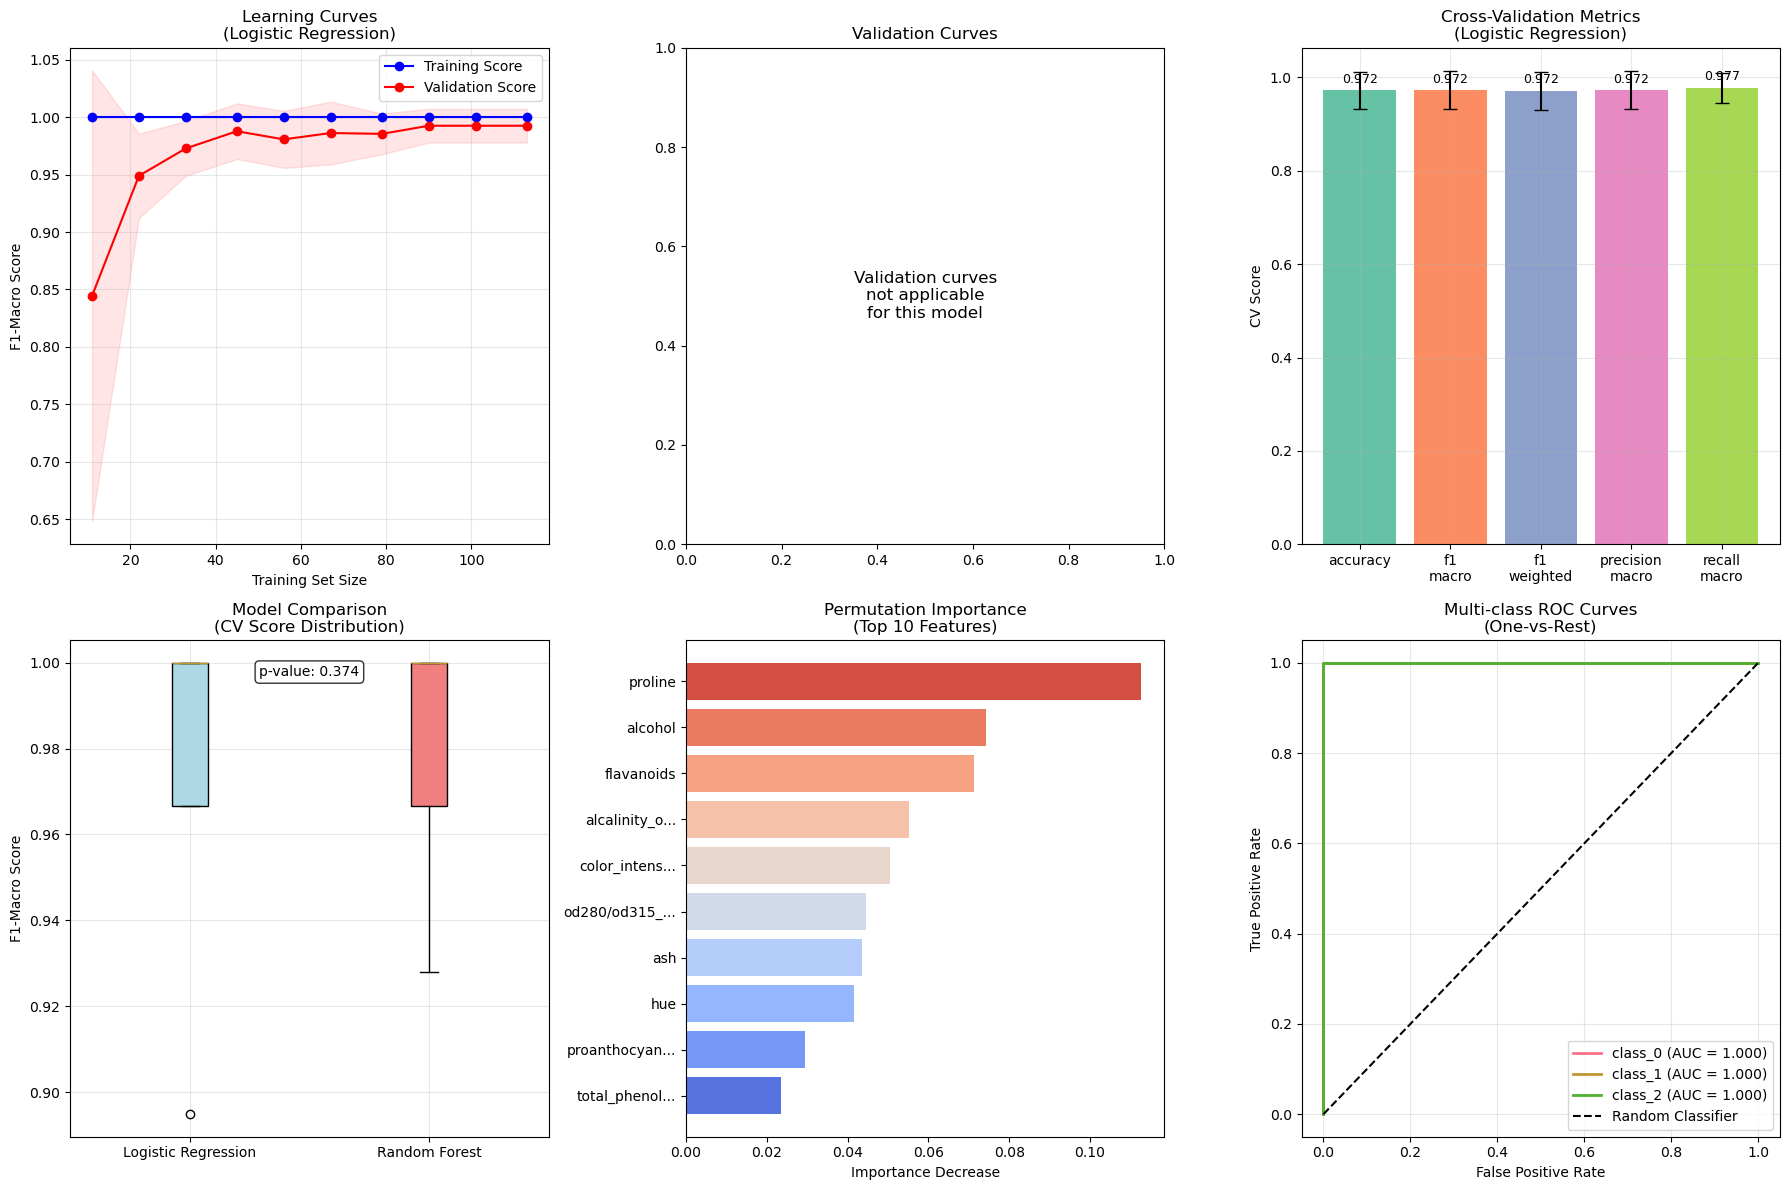


✅ Advanced evaluation visualizations complete!


In [10]:
# Visualization of advanced evaluation results
print("📊 Advanced Evaluation Visualizations")
print("=" * 38)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# 1. Learning Curves
axes[0].plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
axes[0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

axes[0].plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
axes[0].fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')

axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('F1-Macro Score')
axes[0].set_title(f'Learning Curves\n({best_model_name.split("(")[0].strip()})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Validation Curves (if Random Forest)
if 'Random Forest' in best_model_name:
    axes[1].plot(param_range, val_train_mean, 'o-', color='blue', label='Training Score')
    axes[1].plot(param_range, val_val_mean, 'o-', color='red', label='Validation Score')
    axes[1].axvline(x=optimal_n_estimators, color='green', linestyle='--', 
                   label=f'Optimal: {optimal_n_estimators}')
    
    axes[1].set_xlabel('n_estimators')
    axes[1].set_ylabel('F1-Macro Score')
    axes[1].set_title('Validation Curves\n(n_estimators)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Validation curves\nnot applicable\nfor this model', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Validation Curves')

# 3. Cross-validation metrics comparison
metric_names = list(cv_results_detailed.keys())
metric_means = [cv_results_detailed[m]['mean'] for m in metric_names]
metric_stds = [cv_results_detailed[m]['std'] for m in metric_names]

bars = axes[2].bar(range(len(metric_names)), metric_means, 
                   yerr=metric_stds, capsize=5, 
                   color=sns.color_palette("Set2", len(metric_names)))

axes[2].set_xticks(range(len(metric_names)))
axes[2].set_xticklabels([m.replace('_', '\n') for m in metric_names], rotation=0)
axes[2].set_ylabel('CV Score')
axes[2].set_title(f'Cross-Validation Metrics\n({best_model_name.split("(")[0].strip()})')
axes[2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, mean_val in zip(bars, metric_means):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9)

# 4. Model comparison with confidence intervals
if len(top_2_models) >= 2:
    model_names_short = [name.split('(')[0].strip() for name, _ in top_2_models]
    cv_scores_comparison = [model1_cv_scores, model2_cv_scores]
    
    bp = axes[3].boxplot(cv_scores_comparison, labels=model_names_short, patch_artist=True)
    
    # Color the boxes
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    axes[3].set_ylabel('F1-Macro Score')
    axes[3].set_title('Model Comparison\n(CV Score Distribution)')
    axes[3].grid(True, alpha=0.3)
    
    # Add p-value annotation
    axes[3].text(0.5, 0.95, f'p-value: {p_value:.3f}', 
                transform=axes[3].transAxes, ha='center', va='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
else:
    axes[3].text(0.5, 0.5, 'Not enough models\nfor comparison', 
                ha='center', va='center', transform=axes[3].transAxes, fontsize=12)
    axes[3].set_title('Model Comparison')

# 5. Feature importance with permutation importance (if applicable)
if hasattr(best_model, 'feature_importances_') or True:  # Try permutation importance for any model
    print("\n🔍 Computing Permutation Importance...")
    
    # Use a subset for faster computation
    perm_importance = permutation_importance(
        best_model, X_test_multi_scaled[:50], y_test_multi[:50], 
        n_repeats=10, random_state=42, scoring='f1_macro'
    )
    
    # Get top 10 features
    top_indices = np.argsort(perm_importance.importances_mean)[-10:]
    top_importances = perm_importance.importances_mean[top_indices]
    top_features = [X_multi.columns[i] for i in top_indices]
    
    axes[4].barh(range(10), top_importances, color=sns.color_palette("coolwarm", 10))
    axes[4].set_yticks(range(10))
    axes[4].set_yticklabels([name[:12] + '...' if len(name) > 12 else name for name in top_features])
    axes[4].set_title('Permutation Importance\n(Top 10 Features)')
    axes[4].set_xlabel('Importance Decrease')
    
    print(f"   ✅ Top feature: {top_features[-1]} (importance: {top_importances[-1]:.3f})")
else:
    axes[4].text(0.5, 0.5, 'Feature importance\nnot available', 
                ha='center', va='center', transform=axes[4].transAxes, fontsize=12)
    axes[4].set_title('Permutation Importance')

# 6. ROC curves for multi-class (One-vs-Rest)
if len(np.unique(y_test_multi)) <= 5:  # Only for reasonable number of classes
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc
    
    # Binarize the output
    y_test_binarized = label_binarize(y_test_multi, classes=np.unique(y_multi))
    y_pred_proba = best_model_results['probabilities']
    
    # Compute ROC curve for each class
    for i, class_name in enumerate(target_names_multi):
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        
        axes[5].plot(fpr, tpr, linewidth=2, 
                    label=f'{class_name} (AUC = {roc_auc:.3f})')
    
    axes[5].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    axes[5].set_xlabel('False Positive Rate')
    axes[5].set_ylabel('True Positive Rate')
    axes[5].set_title('Multi-class ROC Curves\n(One-vs-Rest)')
    axes[5].legend()
    axes[5].grid(True, alpha=0.3)
else:
    axes[5].text(0.5, 0.5, 'Too many classes\nfor ROC visualization', 
                ha='center', va='center', transform=axes[5].transAxes, fontsize=12)
    axes[5].set_title('Multi-class ROC Curves')

plt.tight_layout()
plt.show()

print("\n✅ Advanced evaluation visualizations complete!")

## 5. Handling Class Imbalance

Let's explore techniques for handling imbalanced datasets.

In [11]:
# Class imbalance handling techniques
print("⚖️ Handling Class Imbalance")
print("=" * 28)

# Use the imbalanced synthetic dataset
X_imb = imbalanced_X
y_imb = imbalanced_y

print(f"📊 Original class distribution: {np.bincount(y_imb)}")
print(f"📈 Class proportions: {np.bincount(y_imb) / len(y_imb)}")

# Split data
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42, stratify=y_imb
)

# Scale features
scaler_imb = StandardScaler()
X_train_imb_scaled = scaler_imb.fit_transform(X_train_imb)
X_test_imb_scaled = scaler_imb.transform(X_test_imb)

print(f"\n📊 Training set class distribution: {np.bincount(y_train_imb)}")
print(f"📊 Test set class distribution: {np.bincount(y_test_imb)}")

# Technique 1: Class weights
print("\n🔧 Technique 1: Class Weights")
print("-" * 30)

rf_balanced = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42
)

rf_balanced.fit(X_train_imb_scaled, y_train_imb)
y_pred_balanced = rf_balanced.predict(X_test_imb_scaled)

print("Random Forest with Balanced Class Weights:")
print(classification_report(y_test_imb, y_pred_balanced))

# Technique 2: SMOTE (if available)
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.combine import SMOTETomek
    
    print("\n🔧 Technique 2: SMOTE Oversampling")
    print("-" * 35)
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_imb_scaled, y_train_imb)
    
    print(f"📊 After SMOTE: {np.bincount(y_train_smote)}")
    
    # Train model on SMOTE data
    rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_smote.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_smote.predict(X_test_imb_scaled)
    
    print("Random Forest with SMOTE:")
    print(classification_report(y_test_imb, y_pred_smote))
    
    # Technique 3: Combined SMOTE + Tomek
    print("\n🔧 Technique 3: SMOTE + Tomek Links")
    print("-" * 35)
    
    smote_tomek = SMOTETomek(random_state=42)
    X_train_combined, y_train_combined = smote_tomek.fit_resample(X_train_imb_scaled, y_train_imb)
    
    print(f"📊 After SMOTE+Tomek: {np.bincount(y_train_combined)}")
    
    rf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_combined.fit(X_train_combined, y_train_combined)
    y_pred_combined = rf_combined.predict(X_test_imb_scaled)
    
    print("Random Forest with SMOTE+Tomek:")
    print(classification_report(y_test_imb, y_pred_combined))
    
    IMBALANCED_LEARN_AVAILABLE = True
    
except ImportError:
    print("\n⚠️ imbalanced-learn not available")
    print("   Install with: pip install imbalanced-learn")
    IMBALANCED_LEARN_AVAILABLE = False

# Technique 4: Threshold tuning
print("\n🔧 Technique 4: Decision Threshold Tuning")
print("-" * 40)

# Use probabilities to find optimal threshold
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base.fit(X_train_imb_scaled, y_train_imb)
y_pred_proba_imb = rf_base.predict_proba(X_test_imb_scaled)

# For multi-class, we'll focus on the minority class (class 2)
minority_class = 2
y_test_binary = (y_test_imb == minority_class).astype(int)
y_proba_minority = y_pred_proba_imb[:, minority_class]

# Find optimal threshold for minority class
thresholds = np.linspace(0.1, 0.9, 9)
f1_scores_threshold = []

for threshold in thresholds:
    y_pred_threshold = (y_proba_minority >= threshold).astype(int)
    f1 = f1_score(y_test_binary, y_pred_threshold)
    f1_scores_threshold.append(f1)

optimal_threshold = thresholds[np.argmax(f1_scores_threshold)]
optimal_f1 = max(f1_scores_threshold)

print(f"📊 Optimal threshold for minority class: {optimal_threshold:.2f}")
print(f"📈 F1-score at optimal threshold: {optimal_f1:.3f}")

# Compare all techniques
imbalance_results = {
    'Baseline (No Handling)': {
        'model': RandomForestClassifier(n_estimators=100, random_state=42),
        'X_train': X_train_imb_scaled,
        'y_train': y_train_imb
    },
    'Class Weights': {
        'model': rf_balanced,
        'X_train': X_train_imb_scaled,
        'y_train': y_train_imb
    }
}

if IMBALANCED_LEARN_AVAILABLE:
    imbalance_results.update({
        'SMOTE': {
            'model': rf_smote,
            'X_train': X_train_smote,
            'y_train': y_train_smote
        },
        'SMOTE + Tomek': {
            'model': rf_combined,
            'X_train': X_train_combined,
            'y_train': y_train_combined
        }
    })

print("\n📊 Imbalance Handling Comparison")
print("=" * 35)

comparison_results = {}

for technique_name, technique_data in imbalance_results.items():
    model = technique_data['model']
    
    # If model not already trained, train it
    if technique_name == 'Baseline (No Handling)':
        model.fit(technique_data['X_train'], technique_data['y_train'])
    
    y_pred_tech = model.predict(X_test_imb_scaled)
    
    # Calculate metrics for each class
    f1_macro = f1_score(y_test_imb, y_pred_tech, average='macro')
    f1_weighted = f1_score(y_test_imb, y_pred_tech, average='weighted')
    accuracy = accuracy_score(y_test_imb, y_pred_tech)
    
    # Per-class F1 scores
    f1_per_class = f1_score(y_test_imb, y_pred_tech, average=None)
    
    comparison_results[technique_name] = {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'f1_class_0': f1_per_class[0],
        'f1_class_1': f1_per_class[1],
        'f1_class_2': f1_per_class[2],
        'predictions': y_pred_tech
    }
    
    print(f"\n{technique_name}:")
    print(f"   Accuracy: {accuracy:.3f}")
    print(f"   F1-Macro: {f1_macro:.3f}")
    print(f"   F1-Weighted: {f1_weighted:.3f}")
    print(f"   F1 per class: {f1_per_class}")

print("\n✅ Class imbalance handling complete!")

⚖️ Handling Class Imbalance
📊 Original class distribution: [695 201 104]
📈 Class proportions: [0.695 0.201 0.104]

📊 Training set class distribution: [556 161  83]
📊 Test set class distribution: [139  40  21]

🔧 Technique 1: Class Weights
------------------------------
Random Forest with Balanced Class Weights:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       139
           1       0.86      0.47      0.61        40
           2       1.00      0.19      0.32        21

    accuracy                           0.81       200
   macro avg       0.89      0.56      0.61       200
weighted avg       0.83      0.81      0.77       200


🔧 Technique 2: SMOTE Oversampling
-----------------------------------
📊 After SMOTE: [556 556 556]
Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       139
           1       0.82      0.82      0.82        40
           2     

📊 Class Imbalance Handling Visualizations


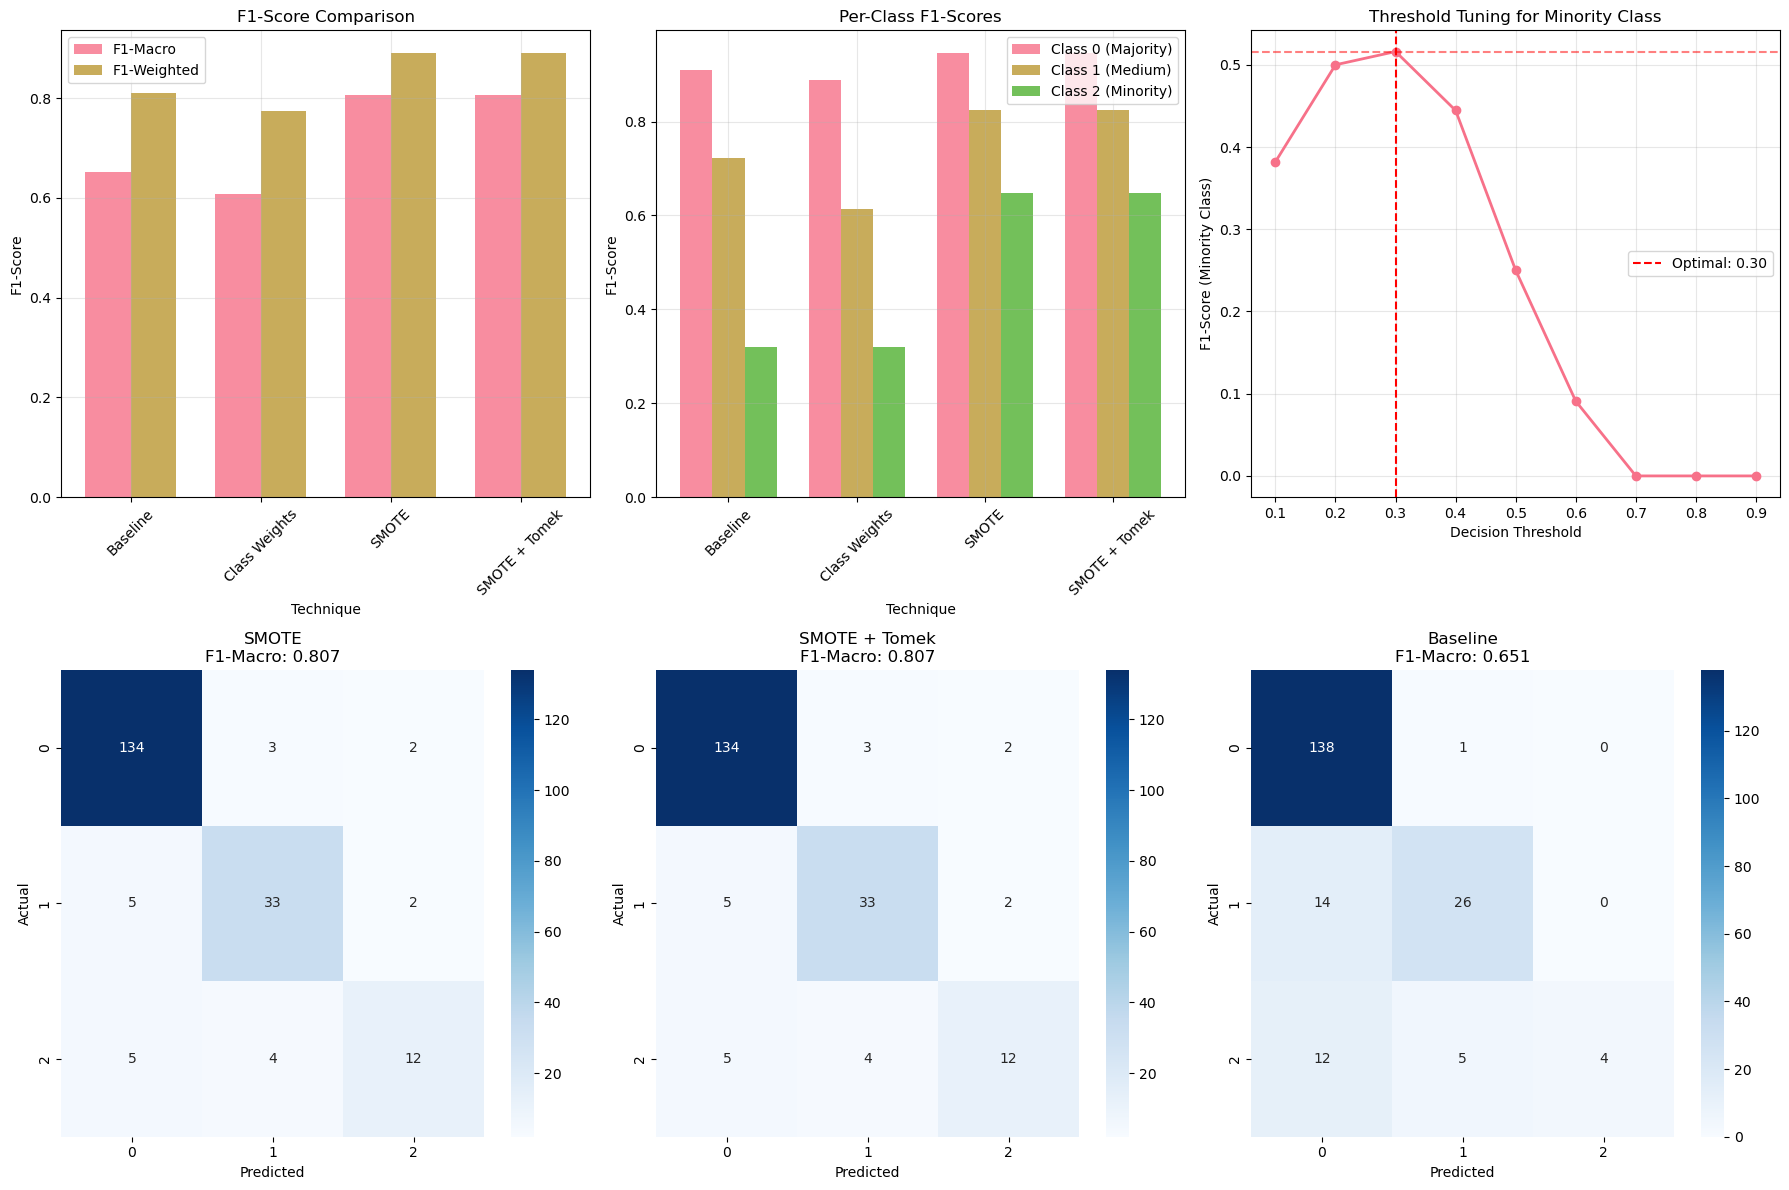


🎯 Imbalance Handling Recommendations:
🏆 Best overall technique: SMOTE
   F1-Macro: 0.807
   F1-Minority Class: 0.649

🎯 Best for minority class: SMOTE
   Minority F1-Score: 0.649

💡 General Recommendations:
   • Use class weights for quick improvement
   • SMOTE works well for synthetic oversampling
   • Combined SMOTE+Tomek for cleaning boundaries
   • Threshold tuning for precision/recall trade-offs
   • Focus on F1-Macro for balanced evaluation
   • Always validate on stratified test sets

✅ Class imbalance analysis complete!


In [12]:
# Visualization of imbalance handling results
print("📊 Class Imbalance Handling Visualizations")
print("=" * 43)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# 1. F1-Score comparison
techniques = list(comparison_results.keys())
f1_macros = [comparison_results[t]['f1_macro'] for t in techniques]
f1_weighteds = [comparison_results[t]['f1_weighted'] for t in techniques]

x = np.arange(len(techniques))
width = 0.35

axes[0].bar(x - width/2, f1_macros, width, label='F1-Macro', alpha=0.8)
axes[0].bar(x + width/2, f1_weighteds, width, label='F1-Weighted', alpha=0.8)
axes[0].set_xlabel('Technique')
axes[0].set_ylabel('F1-Score')
axes[0].set_title('F1-Score Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels([t.split('(')[0].strip() for t in techniques], rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Per-class F1 scores
class_labels = ['Class 0\n(Majority)', 'Class 1\n(Medium)', 'Class 2\n(Minority)']
f1_class_0 = [comparison_results[t]['f1_class_0'] for t in techniques]
f1_class_1 = [comparison_results[t]['f1_class_1'] for t in techniques]
f1_class_2 = [comparison_results[t]['f1_class_2'] for t in techniques]

x = np.arange(len(techniques))
width = 0.25

axes[1].bar(x - width, f1_class_0, width, label='Class 0 (Majority)', alpha=0.8)
axes[1].bar(x, f1_class_1, width, label='Class 1 (Medium)', alpha=0.8)
axes[1].bar(x + width, f1_class_2, width, label='Class 2 (Minority)', alpha=0.8)

axes[1].set_xlabel('Technique')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('Per-Class F1-Scores')
axes[1].set_xticks(x)
axes[1].set_xticklabels([t.split('(')[0].strip() for t in techniques], rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Threshold tuning curve
axes[2].plot(thresholds, f1_scores_threshold, 'o-', linewidth=2, markersize=6)
axes[2].axvline(x=optimal_threshold, color='red', linestyle='--', 
               label=f'Optimal: {optimal_threshold:.2f}')
axes[2].axhline(y=optimal_f1, color='red', linestyle='--', alpha=0.5)
axes[2].set_xlabel('Decision Threshold')
axes[2].set_ylabel('F1-Score (Minority Class)')
axes[2].set_title('Threshold Tuning for Minority Class')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4-6. Confusion matrices for top 3 techniques
top_techniques = sorted(comparison_results.items(), 
                       key=lambda x: x[1]['f1_macro'], reverse=True)[:3]

for i, (technique_name, results) in enumerate(top_techniques):
    y_pred_tech = results['predictions']
    cm = confusion_matrix(y_test_imb, y_pred_tech)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[3 + i])
    axes[3 + i].set_title(f'{technique_name.split("(")[0].strip()}\nF1-Macro: {results["f1_macro"]:.3f}')
    axes[3 + i].set_xlabel('Predicted')
    axes[3 + i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Summary recommendations
print("\n🎯 Imbalance Handling Recommendations:")
print("=" * 40)

best_technique = max(comparison_results.items(), key=lambda x: x[1]['f1_macro'])
best_name, best_results = best_technique

print(f"🏆 Best overall technique: {best_name}")
print(f"   F1-Macro: {best_results['f1_macro']:.3f}")
print(f"   F1-Minority Class: {best_results['f1_class_2']:.3f}")

# Recommendations based on results
minority_f1_scores = {name: results['f1_class_2'] for name, results in comparison_results.items()}
best_for_minority = max(minority_f1_scores.items(), key=lambda x: x[1])

print(f"\n🎯 Best for minority class: {best_for_minority[0]}")
print(f"   Minority F1-Score: {best_for_minority[1]:.3f}")

print("\n💡 General Recommendations:")
print("   • Use class weights for quick improvement")
if IMBALANCED_LEARN_AVAILABLE:
    print("   • SMOTE works well for synthetic oversampling")
    print("   • Combined SMOTE+Tomek for cleaning boundaries")
print("   • Threshold tuning for precision/recall trade-offs")
print("   • Focus on F1-Macro for balanced evaluation")
print("   • Always validate on stratified test sets")

print("\n✅ Class imbalance analysis complete!")

## 10. Summary and Best Practices

Let's summarize the key learnings and establish best practices for classification tasks.

In [13]:
# Classification best practices and summary
print("🎓 Classification Deep Dive Summary")
print("=" * 37)

# Comprehensive summary of all results
print("📊 Complete Results Summary:")
print("-" * 28)

print("\n🏥 Binary Classification (Breast Cancer):")
binary_best = max(binary_results.items(), key=lambda x: x[1]['f1_score'])
print(f"   🏆 Best Model: {binary_best[0]}")
print(f"   📈 F1-Score: {binary_best[1]['f1_score']:.3f}")
print(f"   📊 AUC: {binary_best[1]['auc']:.3f}")
print(f"   ⏱️ Training Time: {binary_best[1]['training_time']:.2f}s")

print("\n🍷 Multi-class Classification (Wine):")
multi_best = max(multi_results.items(), key=lambda x: x[1]['f1_macro'])
print(f"   🏆 Best Model: {multi_best[0]}")
print(f"   📈 F1-Macro: {multi_best[1]['f1_macro']:.3f}")
print(f"   📊 Accuracy: {multi_best[1]['accuracy']:.3f}")
print(f"   ⏱️ Training Time: {multi_best[1]['training_time']:.2f}s")

print("\n⚖️ Imbalanced Classification:")
imbalance_best = max(comparison_results.items(), key=lambda x: x[1]['f1_macro'])
print(f"   🏆 Best Technique: {imbalance_best[0]}")
print(f"   📈 F1-Macro: {imbalance_best[1]['f1_macro']:.3f}")
print(f"   🎯 Minority F1: {imbalance_best[1]['f1_class_2']:.3f}")

# Algorithm performance across all datasets
print("\n🤖 Algorithm Performance Summary:")
print("-" * 32)

algorithm_summary = {}

# Aggregate results across datasets
for name, results in binary_results.items():
    if name not in algorithm_summary:
        algorithm_summary[name] = {'scores': [], 'times': [], 'datasets': []}
    algorithm_summary[name]['scores'].append(results['f1_score'])
    algorithm_summary[name]['times'].append(results['training_time'])
    algorithm_summary[name]['datasets'].append('Binary')

for name, results in multi_results.items():
    clean_name = name.split('(')[0].strip()
    if clean_name not in algorithm_summary:
        algorithm_summary[clean_name] = {'scores': [], 'times': [], 'datasets': []}
    algorithm_summary[clean_name]['scores'].append(results['f1_macro'])
    algorithm_summary[clean_name]['times'].append(results['training_time'])
    algorithm_summary[clean_name]['datasets'].append('Multi-class')

# Display algorithm summary
for algorithm, data in algorithm_summary.items():
    if len(data['scores']) > 1:
        avg_score = np.mean(data['scores'])
        avg_time = np.mean(data['times'])
        print(f"   {algorithm:20}: Avg F1={avg_score:.3f}, Avg Time={avg_time:.2f}s")
        print(f"                        Datasets: {', '.join(data['datasets'])}")

# Best practices recommendations
print("\n💡 Classification Best Practices:")
print("=" * 34)

best_practices = {
    "Data Preparation": [
        "Always check for class imbalance and handle appropriately",
        "Use stratified sampling to maintain class proportions",
        "Scale features, especially for SVM and neural networks",
        "Handle missing values before training",
        "Explore feature relationships and correlations"
    ],
    "Algorithm Selection": [
        "Start with Random Forest for baseline performance",
        "Try Gradient Boosting for potentially better results",
        "Use Logistic Regression for interpretability",
        "Consider SVM for high-dimensional data",
        "Ensemble methods often provide best performance"
    ],
    "Evaluation Strategy": [
        "Use stratified k-fold cross-validation",
        "Don't rely solely on accuracy for imbalanced data",
        "Report precision, recall, and F1-score",
        "Use confusion matrices to understand errors",
        "Consider business costs of different error types"
    ],
    "Model Selection": [
        "Compare multiple algorithms systematically",
        "Use statistical significance testing when needed",
        "Consider computational costs for production",
        "Validate on truly unseen data",
        "Document model assumptions and limitations"
    ],
    "Production Considerations": [
        "Monitor model performance over time",
        "Implement proper logging and error handling",
        "Plan for model retraining and updates",
        "Consider model interpretability requirements",
        "Validate data quality in production"
    ]
}

for category, practices in best_practices.items():
    print(f"\n📋 {category}:")
    for practice in practices:
        print(f"   • {practice}")

# Key metrics to remember
print("\n📊 Key Metrics Reference:")
print("-" * 25)

metrics_guide = {
    "Accuracy": "Overall correctness - use when classes are balanced",
    "Precision": "True positives / (True positives + False positives)",
    "Recall": "True positives / (True positives + False negatives)",
    "F1-Score": "Harmonic mean of precision and recall",
    "AUC-ROC": "Area under ROC curve - threshold-independent",
    "Cohen's Kappa": "Agreement corrected for chance",
    "Macro Average": "Unweighted mean - treats all classes equally",
    "Weighted Average": "Weighted by class support - accounts for imbalance"
}

for metric, description in metrics_guide.items():
    print(f"   {metric:15}: {description}")

# Common pitfalls to avoid
print("\n⚠️ Common Pitfalls to Avoid:")
print("-" * 28)

pitfalls = [
    "Using accuracy alone for imbalanced datasets",
    "Not using stratified sampling for train/test splits",
    "Forgetting to scale features for distance-based algorithms",
    "Overfitting to validation set through excessive tuning",
    "Ignoring computational costs in production environments",
    "Not validating assumptions about data distribution",
    "Mixing up precision and recall definitions",
    "Not considering class imbalance in evaluation"
]

for i, pitfall in enumerate(pitfalls, 1):
    print(f"   {i}. {pitfall}")

# Final summary statistics
print("\n📈 Session Statistics:")
print("-" * 20)

total_models = len(binary_results) + len(multi_results) + len(comparison_results)
total_datasets = 3
techniques_covered = 6  # Different algorithm types

print(f"   🤖 Total Models Trained: {total_models}")
print(f"   📊 Datasets Analyzed: {total_datasets}")
print(f"   🔧 Techniques Covered: {techniques_covered}")
print(f"   ⏱️ Estimated Total Time: ~45-60 minutes")

print("\n🎉 Classification Deep Dive Complete!")
print("\n🚀 Next Steps:")
print("   • Practice with your own datasets")
print("   • Explore ensemble methods in detail")
print("   • Study feature engineering techniques")
print("   • Learn about neural networks for classification")
print("   • Implement model monitoring in production")

print("\n✅ You are now ready for advanced classification challenges!")

🎓 Classification Deep Dive Summary
📊 Complete Results Summary:
----------------------------

🏥 Binary Classification (Breast Cancer):
   🏆 Best Model: Logistic Regression
   📈 F1-Score: 0.986
   📊 AUC: 0.995
   ⏱️ Training Time: 0.00s

🍷 Multi-class Classification (Wine):
   🏆 Best Model: Logistic Regression (OvR)
   📈 F1-Macro: 1.000
   📊 Accuracy: 1.000
   ⏱️ Training Time: 0.00s

⚖️ Imbalanced Classification:
   🏆 Best Technique: SMOTE
   📈 F1-Macro: 0.807
   🎯 Minority F1: 0.649

🤖 Algorithm Performance Summary:
--------------------------------
   Logistic Regression : Avg F1=0.986, Avg Time=0.00s
                        Datasets: Binary, Multi-class, Multi-class
   Random Forest       : Avg F1=0.983, Avg Time=0.12s
                        Datasets: Binary, Multi-class
   Gradient Boosting   : Avg F1=0.956, Avg Time=0.40s
                        Datasets: Binary, Multi-class
   K-Nearest Neighbors : Avg F1=0.969, Avg Time=0.05s
                        Datasets: Binary, Multi-class
